Text(0, 0.5, 'True')

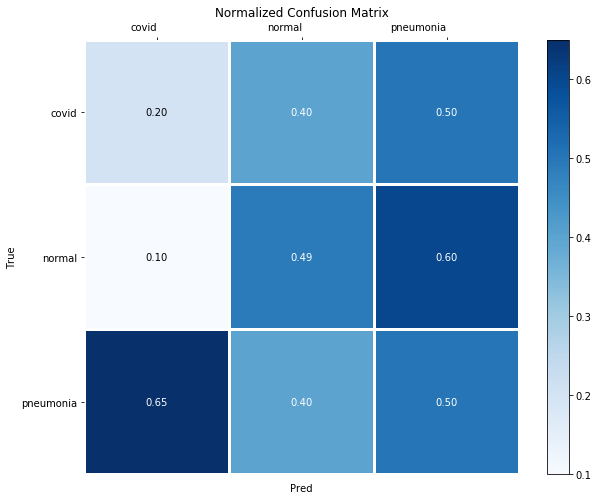

In [117]:
import matplotlib.pyplot as plt
import matplotlib
def _heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def _annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolors=["black", "white"], threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

res = pd.DataFrame(data=[[0.2, 0.4, 0.5], [0.1, 0.49, 0.6], [0.65, 0.4, 0.5]], index=[0,1,2], columns=[0,1,2])
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(1, 1, 1)
im, cbar = _heatmap(res, class_names, class_names, ax=ax, cmap="Blues", cbarlabel=None)
texts = _annotate_heatmap(im, valfmt="{x:.2f}")
ax.set_title('Normalized Confusion Matrix')
ax.set_xlabel('Pred')
ax.set_ylabel('True')

In [121]:
res.values.astype(float)

array([[0.2 , 0.4 , 0.5 ],
       [0.1 , 0.49, 0.6 ],
       [0.65, 0.4 , 0.5 ]])

In [1]:
import pyspark
from src.etl import *
from src.utils import *
import yaml
from collections import Counter
from collections import defaultdict

# once intialized, it's global in the jupyter notebook kernal; one context per notebook
sc = pyspark.SparkContext.getOrCreate('local[*]')

AttributeError: 'str' object has no attribute 'get'

In [ ]:
big_list = range(10000)
rdd = sc.parallelize(big_list, 2)
odds = rdd.filter(lambda x: x % 2 != 0)
odds.take(5)

In [18]:
rdd

NameError: name 'rdd' is not defined

In [64]:
"""
SELECT subject_id, sex, dob, ifnull(dod, "")
FROM PATIENT
"""

'\nSELECT subject_id, sex, dob, ifnull(dod, "")\nFROM PATIENT\n'

## meta

In [ ]:
from src.etl import *
from src.utils import *
import yaml
from collections import Counter
from collections import defaultdict

In [ ]:
params['data']['image_size']

In [ ]:
META = etl()

In [ ]:
print('label distribution: ', Counter(META.label), sep='\n')

## train / test split

In [ ]:
META = dataset_split(META)
META.head()

In [ ]:
print('label integer map: ', params['train']['labelmap'], sep='\n', end='\n\n')
for ds in (0, 1):
    print('{0} data from covid datasets: '.format({0: 'test', 1: 'train'}[ds]), Counter(META[META.train==ds].label), sep='\n', end='\n\n')

In [ ]:
# cache image meta
if not os.path.isdir(SAVE_PATH):
    os.makedirs(SAVE_PATH)
with open(os.path.join(SAVE_PATH, 'meta'), 'wb') as pickle_file:
    pickle.dump(META, pickle_file, pickle.HIGHEST_PROTOCOL)
    print(f"META data saved at {os.path.join(SAVE_PATH, 'meta')}")

In [ ]:
%%time
if False:
    # -------------------------------------------------------------------------------------------------------------------
    # imagge file to matrix  
    # NOTE: this needs model to load all data at once into cache which take up too much storage, 
    #       making computing inefficient, NOT GOOD
    # -------------------------------------------------------------------------------------------------------------------
    # train_data / test_data structure: 
    #                        {'covid': {'data': list of size*size*3 numpy array, 'label': corresponding list of integer},
    #                        '!covid': {'data': list of size*size*3 numpy array, 'label': corresponding list of integer}}
    TRAIN_DATA, TEST_DATA = datafromfile(META)
    # a sanity check
    print(f"train covid sample #: {len(TRAIN_DATA['covid']['label'])}")
    print(f"train !covid sample #: {len(TRAIN_DATA['!covid']['label'])}")
    print(f"test  covid sample #: {len(TEST_DATA['covid']['label'])}")
    print(f"test  !covid sample #: {len(TEST_DATA['!covid']['label'])}")
    # cache image data
    with open(os.path.join(SAVE_PATH, 'train.data'), 'wb') as pickle_file:
        pickle.dump(TRAIN_DATA, pickle_file, pickle.HIGHEST_PROTOCOL)
        print(f"Image data saved at {os.path.join(SAVE_PATH, 'train.data')}")
    with open(os.path.join(SAVE_PATH, 'test.data'), 'wb') as pickle_file:
        pickle.dump(TEST_DATA, pickle_file, pickle.HIGHEST_PROTOCOL)
        print(f"Image data saved at {os.path.join(SAVE_PATH, 'test.data')}")
else:
    # merge imgaes together instead, and transform image to batches of matrix during training
    mergesoure(META)

In [ ]:
# sanity check for image shape, they need to consistent with model input
import cv2
import glob
import numpy as np
for i in np.random.choice(META.index, 10):
    print(i, cv2.imread(META.loc[i, 'imgid']).shape)